In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Salary Prediction of Data Professions.csv')

# Define the columns to drop
columns_to_drop = ['FIRST NAME', 'LAST NAME','DOJ','CURRENT DATE']  # Replace with actual column names

# Drop the columns and create a new DataFrame (without inplace modification)
df = df.drop(columns=columns_to_drop, axis=1)

# Print the modified DataFrame (optional)
print(df)

# Alternatively, modify the original DataFrame in-place
# df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Save the modified DataFrame to a new CSV file (optional)
# df_modified.to_csv('salary_modified.csv', index=False)


     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate   NaN   89207         Web          NaN   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst   NaN   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  
0                  6.0      2.0         0  
1                 13.0      NaN         7  
2                  7.0      3.0         0  
3                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2639 non-null   object 
 1   DESIGNATION       2639 non-null   object 
 2   AGE               2636 non-null   float64
 3   SALARY            2639 non-null   int64  
 4   UNIT              2639 non-null   object 
 5   LEAVES USED       2636 non-null   float64
 6   LEAVES REMAINING  2637 non-null   float64
 7   RATINGS           2637 non-null   float64
 8   PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 185.7+ KB


In [ ]:
def fill_and_convert(df, columns_to_fill):
  """Fills null values in specified columns with rounded mean (int) converted to float.

  Args:
      df (pandas.DataFrame): The DataFrame to modify.
      columns_to_fill (list): A list of column names to consider for filling null values.

  Returns:
      pandas.DataFrame: The DataFrame with null values filled and converted.
  """
  for col in columns_to_fill:
    df.loc[df[col].isnull(), col] = df[col].fillna(df[col].mean()).round().astype(int).astype(float)
  return df

# Specify the columns to fill null values (replace with actual columns)
columns_to_fill = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS']  # Replace with actual column names

# Fill null values with rounded mean (int) converted to float
df = fill_and_convert(df, columns_to_fill.copy())

# Print the modified DataFrame (optional)
print(df)

     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  
0                  6.0      2.0         0  
1                 13.0      3.0         7  
2                  7.0      3.0         0  
3                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               2639 non-null   object 
 1   DESIGNATION       2639 non-null   object 
 2   AGE               2639 non-null   float64
 3   SALARY            2639 non-null   int64  
 4   UNIT              2639 non-null   object 
 5   LEAVES USED       2639 non-null   float64
 6   LEAVES REMAINING  2639 non-null   float64
 7   RATINGS           2639 non-null   float64
 8   PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 185.7+ KB


In [ ]:
print(df)

     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  
0                  6.0      2.0         0  
1                 13.0      3.0         7  
2                  7.0      3.0         0  
3                  

In [ ]:
import pandas as pd

def remove_outliers_iqr(df, columns_to_check):
  """Removes outliers based on IQR for specified columns.

  Args:
      df (pandas.DataFrame): The DataFrame to modify.
      columns_to_check (list): A list of column names to check for outliers.

  Returns:
      pandas.DataFrame: The DataFrame with outliers removed.
  """
  for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

# Specify the columns to check for outliers (replace with actual columns)
columns_to_check = ['AGE', 'LEAVES USED', 'LEAVES REMAINING','RATINGS','PAST EXP']  # Replace with actual column names

# Remove outliers using IQR
df_1 = remove_outliers_iqr(df.copy(), columns_to_check.copy())

# Print the DataFrame without outliers (optional)
print(df_1)


     SEX DESIGNATION   AGE  SALARY       UNIT  LEAVES USED  LEAVES REMAINING  \
0      F     Analyst  21.0   44570    Finance         24.0               6.0   
2      F     Analyst  21.0   40955    Finance         23.0               7.0   
3      F     Analyst  22.0   45550         IT         22.0               8.0   
5      F     Analyst  22.0   48736  Marketing         20.0              10.0   
6      M     Analyst  22.0   40339  Marketing         19.0              11.0   
...   ..         ...   ...     ...        ...          ...               ...   
2633   F     Analyst  24.0   40277        Web         17.0              13.0   
2635   F     Analyst  23.0   45758         IT         17.0              13.0   
2636   F     Analyst  21.0   47315        Web         29.0               1.0   
2637   F     Analyst  24.0   45172        Web         23.0               7.0   
2638   M     Analyst  24.0   49176  Marketing         17.0              13.0   

      RATINGS  PAST EXP  
0         2.0

In [ ]:
print(df)

     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  
0                  6.0      2.0         0  
1                 13.0      3.0         7  
2                  7.0      3.0         0  
3                  

In [ ]:
# Count the number of unique values in 'designation' and 'unit' columns
n_designation = df['DESIGNATION'].nunique()
n_unit = df['UNIT'].nunique()

# Print the results
print(f"There are {n_designation} unique designations in the dataset.")
print(f"There are {n_unit} unique units in the dataset.")

There are 6 unique designations in the dataset.
There are 6 unique units in the dataset.


In [ ]:
# Get unique designations and units
unique_designations = df['DESIGNATION'].unique()
unique_units = df['UNIT'].unique()

# Print unique designations
print("Unique Designations:")
for designation in unique_designations:
  print(designation)

# Print unique units
print("\nUnique Units:")
for unit in unique_units:
  print(unit)

Unique Designations:
Analyst
Associate
Senior Analyst
Senior Manager
Manager
Director

Unique Units:
Finance
Web
IT
Operations
Marketing
Management


In [ ]:

# Define a dictionary for mapping sex to numerical values (0 or 1)
sex_mapping = {'M': 0, 'F': 1}

# Apply the mapping to the 'SEX' column using a lambda function
df['SEX_encoded'] = df['SEX'].apply(lambda x: sex_mapping[x])

# Print the modified DataFrame (optional)
print(df)


     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  
0                  6.0      2.0         0            1  
1                 13.0      3.0         7            1  
2                  7.0  

In [ ]:



# Create a new column by combining designation and unit
df['designation_unit'] = df['DESIGNATION'] + '_' + df['UNIT']

# Print the modified DataFrame (optional)
print(df)


     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0                  6.0      2.0         0            1   
1                 13.0      3.0         7            1   
2                  7.

In [ ]:
# Count the number of unique values in 'designation' and 'unit' columns
n_designation = df['designation_unit'].nunique()
#n_unit = df['UNIT'].nunique()

# Print the results
print(f"There are {n_designation} unique designations in the dataset.")
#print(f"There are {n_unit} unique units in the dataset.")

There are 36 unique designations in the dataset.


In [ ]:

# Define dictionaries for designation and unit encoding
designation_mapping = {
    'Analyst': 1,
    'Associate': 2,
    'Senior Analyst': 3,
    'Senior Manager': 4,
    'Manager': 5,
    'Director': 6
}

unit_mapping = {
    'Finance': 1,
    'Web': 2,
    'IT': 3,
    'Operations': 4,
    'Marketing': 5,
    'Management': 6
}

# Create new columns with encoded values
df['designation_encoded'] = df['DESIGNATION'].map(designation_mapping)
df['unit_encoded'] = df['UNIT'].map(unit_mapping)

# Print the modified DataFrame (optional)
print(df)


     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0                  6.0      2.0         0            1   
1                 13.0      3.0         7            1   
2                  7.

In [ ]:

# Specify the columns to find min and max values (replace with actual columns)
columns_of_interest = ['AGE', 'LEAVES USED', 'LEAVES REMAINING','SALARY','RATINGS','PAST EXP']

# Calculate min and max values for each column
min_values = df[columns_of_interest].min(axis=0)
max_values = df[columns_of_interest].max(axis=0)

# Print the results
print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)


Minimum values:
AGE                    21.0
LEAVES USED            15.0
LEAVES REMAINING        0.0
SALARY              40001.0
RATINGS                 2.0
PAST EXP                0.0
dtype: float64

Maximum values:
AGE                     45.0
LEAVES USED             30.0
LEAVES REMAINING        15.0
SALARY              388112.0
RATINGS                  5.0
PAST EXP                23.0
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale (replace with actual column names)
columns_to_scale = ['AGE', 'LEAVES USED', 'LEAVES REMAINING','PAST EXP']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data (assuming you have a split)
# Replace 'df' with your training data if using a split
scaler.fit(df[columns_to_scale])

# Transform the specified columns using the fitted scaler
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

# Print the scaled DataFrame (optional)
print(df)


     SEX     DESIGNATION       AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  0.000000   44570     Finance     0.600000   
1      F       Associate  0.166667   89207         Web     0.533333   
2      F         Analyst  0.000000   40955     Finance     0.533333   
3      F         Analyst  0.041667   45550          IT     0.466667   
4      M         Analyst  0.166667   43161  Operations     0.800000   
...   ..             ...       ...     ...         ...          ...   
2634   F  Senior Manager  0.625000  185977  Management     0.000000   
2635   F         Analyst  0.083333   45758          IT     0.133333   
2636   F         Analyst  0.000000   47315         Web     0.933333   
2637   F         Analyst  0.125000   45172         Web     0.533333   
2638   M         Analyst  0.125000   49176   Marketing     0.133333   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0             0.400000      2.0  0.000000            1   
1             0.866667      3.0

In [ ]:
# Assuming you have the scaled data in a DataFrame named 'df_scaled'
# and the minimum ('min_values') and maximum ('max_values') values used for scaling
df_unscaled = df.copy()
# Define columns with numerical features (replace with actual names)
numerical_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']

# Rescale each numerical feature (assuming Min-Max scaling)
for feature in numerical_features:
  min_value = min_values[feature]
  max_value = max_values[feature]
  df_unscaled[feature] = df[feature] * (max_value - min_value) + min_value


In [ ]:
print(df_unscaled)

     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0                  6.0      2.0       0.0            1   
1                 13.0      3.0       7.0            1   
2                  7.

In [ ]:
# Create a new column named "total_leaves" by adding existing columns
df_unscaled['total_leaves'] = df_unscaled['LEAVES USED'] + df_unscaled['LEAVES REMAINING']

# Print the DataFrame with the new column (optional)
print(df_unscaled)

     SEX     DESIGNATION   AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  21.0   44570     Finance         24.0   
1      F       Associate  25.0   89207         Web         23.0   
2      F         Analyst  21.0   40955     Finance         23.0   
3      F         Analyst  22.0   45550          IT         22.0   
4      M         Analyst  25.0   43161  Operations         27.0   
...   ..             ...   ...     ...         ...          ...   
2634   F  Senior Manager  36.0  185977  Management         15.0   
2635   F         Analyst  23.0   45758          IT         17.0   
2636   F         Analyst  21.0   47315         Web         29.0   
2637   F         Analyst  24.0   45172         Web         23.0   
2638   M         Analyst  24.0   49176   Marketing         17.0   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0                  6.0      2.0       0.0            1   
1                 13.0      3.0       7.0            1   
2                  7.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale (replace with actual column names)
columns_to_scale = ['AGE', 'LEAVES USED', 'LEAVES REMAINING','PAST EXP','total_leaves']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data (assuming you have a split)
# Replace 'df' with your training data if using a split
scaler.fit(df_unscaled[columns_to_scale])

# Transform the specified columns using the fitted scaler
df_unscaled[columns_to_scale] = scaler.transform(df_unscaled[columns_to_scale])

# Print the scaled DataFrame (optional)
print(df_unscaled)


     SEX     DESIGNATION       AGE  SALARY        UNIT  LEAVES USED  \
0      F         Analyst  0.000000   44570     Finance     0.600000   
1      F       Associate  0.166667   89207         Web     0.533333   
2      F         Analyst  0.000000   40955     Finance     0.533333   
3      F         Analyst  0.041667   45550          IT     0.466667   
4      M         Analyst  0.166667   43161  Operations     0.800000   
...   ..             ...       ...     ...         ...          ...   
2634   F  Senior Manager  0.625000  185977  Management     0.000000   
2635   F         Analyst  0.083333   45758          IT     0.133333   
2636   F         Analyst  0.000000   47315         Web     0.933333   
2637   F         Analyst  0.125000   45172         Web     0.533333   
2638   M         Analyst  0.125000   49176   Marketing     0.133333   

      LEAVES REMAINING  RATINGS  PAST EXP  SEX_encoded  \
0             0.400000      2.0  0.000000            1   
1             0.866667      3.0

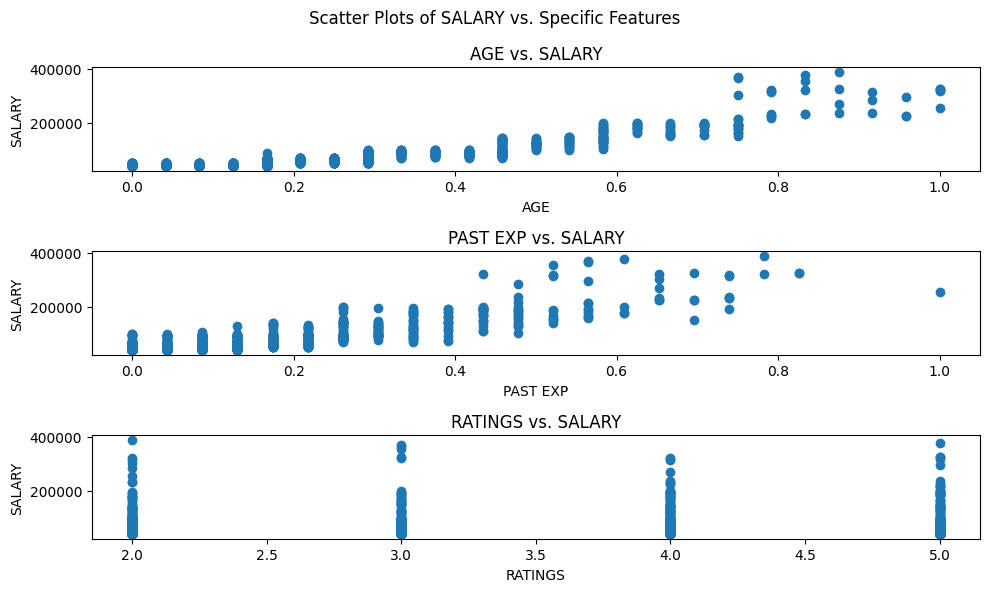

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the feature to plot against (target variable)
target_feature = 'SALARY'

# Select the specific features to plot
features_to_plot = ['AGE', 'PAST EXP','RATINGS']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(10, 6))  # Adjust figure size as needed

# Iterate through features and create scatter plots on each subplot
for idx, feature in enumerate(features_to_plot):
  axes[idx].scatter(df_unscaled[feature], df_unscaled[target_feature])  # Scatter plot for each feature
  axes[idx].set_xlabel(feature)  # Set x-axis label
  axes[idx].set_ylabel(target_feature)  # Set y-axis label (consistent for all subplots)
  axes[idx].title.set_text(f'{feature} vs. {target_feature}')  # Set subplot title

# Add a main title for the overall figure (optional)
fig.suptitle(f'Scatter Plots of {target_feature} vs. Specific Features')

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()


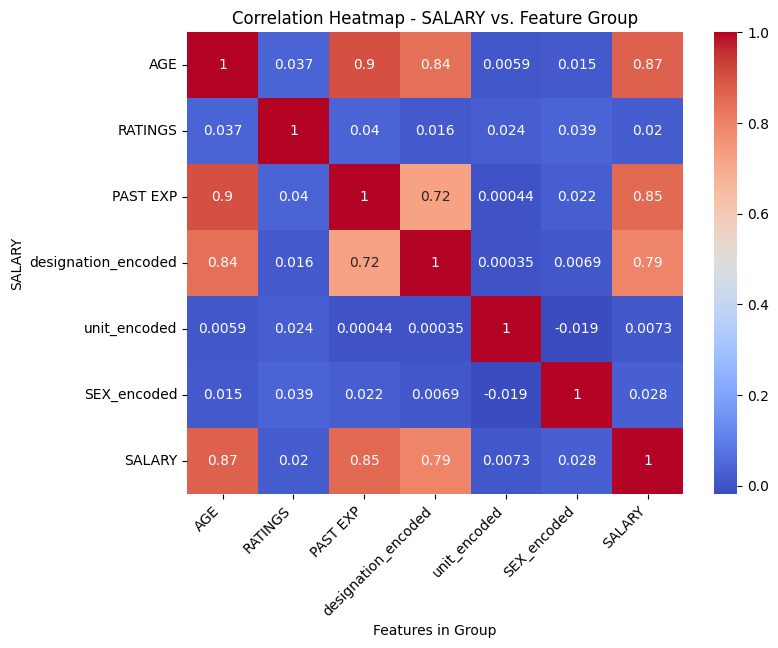

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target feature
target_feature = 'SALARY'

# Define the group of features to consider for the heatmap
feature_group = ['AGE', 'RATINGS', 'PAST EXP','designation_encoded','unit_encoded','SEX_encoded']

# Create a subset of the DataFrame with only the target feature and feature group
subset_df = df_unscaled[feature_group + [target_feature]]

# Calculate the correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Adjust cmap for color scheme

# Add labels and title
plt.xlabel('Features in Group')
plt.ylabel(target_feature)
plt.title(f'Correlation Heatmap - {target_feature} vs. Feature Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Specify the features you want to use['AGE', 'PAST EXP', 'designation_encoded','unit_encoded','SEX_encoded','RATINGS']
features_to_use =['AGE', 'PAST EXP', 'designation_encoded','unit_encoded','SEX_encoded','RATINGS']   # Replace with your desired features

# Split data into training and testing sets
X = df[features_to_use]  # Select features from the DataFrame
y = df['SALARY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the models
models = {}

# Linear Regression
models['Linear Regression'] = LinearRegression()
models['Linear Regression'].fit(X_train, y_train)

# Decision Tree Regressor
models['Decision Tree'] = DecisionTreeRegressor()
models['Decision Tree'].fit(X_train, y_train)

# Random Forest Regressor
models['Random Forest'] = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
models['Random Forest'].fit(X_train, y_train)

# Gradient Boosting Regressor
models['Gradient Boosting'] = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Adjust n_estimators and learning_rate as needed
models['Gradient Boosting'].fit(X_train, y_train)

# Evaluate model performance on training and testing sets
for name, model in models.items():
  # Training set predictions
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mae_train = mean_absolute_error(y_train, y_pred_train)
  r2_train = r2_score(y_train, y_pred_train)
  rmse_train = np.sqrt(mse_train)  # Calculate RMSE

  # Testing set predictions
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)  # Calculate RMSE

  # Print detailed results
  print(f"\n{name} Performance:")
  print(f"Training Set - MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, R2: {r2_train:.2f}, RMSE: {rmse_train:.2f}")
  print(f"Testing Set - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")




Linear Regression Performance:
Training Set - MSE: 243386553.60, MAE: 10351.72, R2: 0.81, RMSE: 15600.85
Testing Set - MSE: 355396478.60, MAE: 11201.07, R2: 0.79, RMSE: 18851.96

Decision Tree Performance:
Training Set - MSE: 7298024.96, MAE: 1627.61, R2: 0.99, RMSE: 2701.49
Testing Set - MSE: 91004497.76, MAE: 4717.60, R2: 0.95, RMSE: 9539.63

Random Forest Performance:
Training Set - MSE: 14707017.06, MAE: 2433.98, R2: 0.99, RMSE: 3834.97
Testing Set - MSE: 99854296.89, MAE: 4629.53, R2: 0.94, RMSE: 9992.71

Gradient Boosting Performance:
Training Set - MSE: 27681858.51, MAE: 3684.53, R2: 0.98, RMSE: 5261.36
Testing Set - MSE: 127149999.08, MAE: 4649.96, R2: 0.92, RMSE: 11276.08


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler  # Import for normalization (optional)

# Specify the features you want to use
features_to_use = ['AGE', 'PAST EXP', 'designation_encoded','unit_encoded','SEX_encoded','RATINGS']  # Replace with your desired features

# Split data into training and testing sets
X = df[features_to_use]  # Select features from the DataFrame
y = df['SALARY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature Normalization (consider if features have different scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models with regularization or hyperparameter tuning
models = {}

# Linear Regression (L1/L2 Regularization)
# Try both approaches with and without random_state
# Option 1 (might work if random_state is supported):
# models['Linear Regression'] = LinearRegression(random_state=42)  # Add random_state for reproducibility

# Option 2 (if Option 1 throws TypeError):
models['Linear Regression'] = LinearRegression()

# Decision Tree (Max Depth Control)
models['Decision Tree'] = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed

# Random Forest (Number of Estimators)
models['Random Forest'] = RandomForestRegressor(n_estimators=50, random_state=42)  # Adjust n_estimators as needed

# Gradient Boosting (Learning Rate and Number of Estimators)
models['Gradient Boosting'] = GradientBoostingRegressor(learning_rate=0.05, n_estimators=80, random_state=42)  # Adjust hyperparameters as needed

# Evaluate model performance on training and testing sets
for name, model in models.items():
  # Ensure model is fitted before prediction
  model.fit(X_train, y_train)  # Fit the model

  # Training set predictions
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mae_train = mean_absolute_error(y_train, y_pred_train)
  r2_train = r2_score(y_train, y_pred_train)
  rmse_train = np.sqrt(mse_train)  # Calculate RMSE

  # Testing set predictions
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)  # Calculate RMSE

  # Print detailed results
  print(f"\n{name} Performance:")
  print(f"Training Set - MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, R2: {r2_train:.2f}, RMSE: {rmse_train:.2f}")
  print(f"Testing Set - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")


Linear Regression Performance:
Training Set - MSE: 243386553.60, MAE: 10351.72, R2: 0.81, RMSE: 15600.85
Testing Set - MSE: 355396478.60, MAE: 11201.07, R2: 0.79, RMSE: 18851.96

Decision Tree Performance:
Training Set - MSE: 33369894.49, MAE: 3775.54, R2: 0.97, RMSE: 5776.67
Testing Set - MSE: 99772681.32, MAE: 4499.04, R2: 0.94, RMSE: 9988.63

Random Forest Performance:
Training Set - MSE: 15157642.18, MAE: 2437.64, R2: 0.99, RMSE: 3893.28
Testing Set - MSE: 109753897.91, MAE: 4704.62, R2: 0.93, RMSE: 10476.35

Gradient Boosting Performance:
Training Set - MSE: 37926328.06, MAE: 3962.18, R2: 0.97, RMSE: 6158.44
Testing Set - MSE: 129043390.54, MAE: 4832.03, R2: 0.92, RMSE: 11359.73


In [ ]:
import sklearn as skl
print(skl.__version__)


1.2.2


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

features_to_use = ['AGE', 'PAST EXP', 'designation_encoded','unit_encoded','SEX_encoded','RATINGS']

X = df[features_to_use]  # Select features from the DataFrame
y = df['SALARY']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Decision Tree with GridSearchCV for Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 8],  # Experiment with different depths
    'min_samples_split': [2, 5, 10],  # Experiment with minimum samples to split
    'min_samples_leaf': [1, 4, 8],  # Experiment with minimum samples at leaf nodes
    'ccp_alpha': [0.001, 0.01, 0.1]  # L1 regularization hyperparameter
}

# Decision Tree (Max Depth Control)
model_dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='neg_mean_squared_error')  # Use negative MSE for maximization
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on training data
best_model.fit(X_train, y_train)

# Evaluate model performance
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print detailed results
print("\nDecision Tree Performance (GridSearchCV):")
print(f"Best Parameters: {best_params}")
print(f"Training Set - MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, R2: {r2_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Testing Set - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")


Decision Tree Performance (GridSearchCV):
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training Set - MSE: 35058780.52, MAE: 3817.20, R2: 0.97, RMSE: 5921.05
Testing Set - MSE: 99150441.06, MAE: 4513.76, R2: 0.94, RMSE: 9957.43
